### 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_금산군\\data_final.csv')
df.head()

,개최연도,축제명,예산(백만원),방문객수,개최 기간,시도명,시군구명,행정동명,위도,경도,...,소득3천만원주민비율,소득4천만원주민비율,소득5천만원주민비율,소득6천만원주민비율,소득7천만원주민비율,소득7천만원이상주민비율,평균기온(°C),평균 풍속(m/s),평균 상대습도(%),비 유무
0,2023,강남페스티벌,2532.0,56894.0,11,서울특별시,강남구,삼성1동,37.512561,127.058777,...,0.28,0.21,0.13,0.07,0.05,0.18,19.7,2.2,77.0,1.0
1,2019,강남페스티벌,2233.0,312502000.0,7,서울특별시,강남구,삼성1동,37.512561,127.058777,...,0.28,0.21,0.13,0.07,0.05,0.18,22.4,1.6,61.0,0.0
2,2023,선사문화축제,596.0,466174.0,27,서울특별시,강동구,암사2동,37.559854,127.130832,...,0.34,0.26,0.13,0.06,0.04,0.08,17.1,2.5,67.1,0.0
3,2021,선사문화축제,617.0,10000.0,25,서울특별시,강동구,암사2동,37.559854,127.130832,...,0.34,0.26,0.13,0.06,0.04,0.08,18.8,1.7,91.3,1.0
4,2018,선사문화축제,640.0,400000.0,22,서울특별시,강동구,암사2동,37.559854,127.130832,...,0.34,0.26,0.13,0.06,0.04,0.08,14.8,1.1,47.0,0.0


### 2. 데이터 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   개최연도          856 non-null    int64  
 1   축제명           856 non-null    object 
 2   예산(백만원)       856 non-null    float64
 3   방문객수          856 non-null    float64
 4   개최 기간         856 non-null    int64  
 5   시도명           856 non-null    object 
 6   시군구명          856 non-null    object 
 7   행정동명          856 non-null    object 
 8   위도            856 non-null    float64
 9   경도            856 non-null    float64
 10  서울과의 거리       856 non-null    float64
 11  광역시와의 거리      856 non-null    float64
 12  축제시작일         856 non-null    object 
 13  축제종료일         856 non-null    object 
 14  축제 일수         856 non-null    int64  
 15  주말/공휴일 유무     856 non-null    int64  
 16  개최 월          856 non-null    int64  
 17  개최 계절         856 non-null    object 
 18  KTX역 유무       856 non-null    

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

df.describe()

,개최연도,예산(백만원),방문객수,개최 기간,위도,경도,서울과의 거리,광역시와의 거리,축제 일수,주말/공휴일 유무,개최 월,KTX역 유무,동일 기간 축제 수,검색량(3개월),10대_인구수,20대_인구수,30대_인구수,40대_인구수,50대_인구수,평균 나이,60대이상_인구수,고령 지수,소득2천만원주민비율,소득3천만원주민비율,소득4천만원주민비율,소득5천만원주민비율,소득6천만원주민비율,소득7천만원주민비율,소득7천만원이상주민비율,평균기온(°C),평균 풍속(m/s),평균 상대습도(%),비 유무
count,856.000000,8.560000e+02,8.560000e+02,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,8.560000e+02,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,2020.556075,3.823440e+03,8.716937e+05,24.880841,36.140264,127.649906,189.229073,54.057800,35.814252,0.977804,8.102804,0.379673,23.425234,4.480208e+04,1602.941015,1222.942208,1965.940627,2002.573673,2532.686083,55.333835,6034.043607,0.461637,0.128903,0.383724,0.254125,0.108126,0.052153,0.026986,0.046575,16.600000,1.769626,70.398248,0.237150
std,2.022478,8.546752e+04,1.207791e+07,75.027510,1.037440,0.890760,110.445022,42.897531,414.312303,0.147408,2.596208,0.485589,27.306688,9.750422e+04,1493.756189,1185.605551,1726.940488,1877.656578,2229.491374,4.307404,4172.941598,0.093059,0.019053,0.044267,0.013607,0.015888,0.010090,0.007300,0.021791,7.056636,1.009122,14.308973,0.425583
min,2018.000000,0.000000e+00,5.000000e+01,0.000000,33.236550,125.190419,1.791382,0.023570,-729.000000,0.000000,1.000000,0.000000,-1.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,43.659180,0.000000,0.207214,0.080000,0.270000,0.210000,0.070000,0.030000,0.010000,0.020000,-11.800000,0.300000,18.300000,0.000000
25%,2019.000000,1.800000e+02,3.000000e+04,12.000000,35.257673,126.911385,98.270750,21.221272,3.000000,1.000000,6.000000,0.000000,7.000000,2.365000e+03,523.285714,385.000000,732.000000,713.500000,917.000000,52.389395,3373.000000,0.398338,0.116000,0.350000,0.245000,0.100000,0.040000,0.020000,0.030000,13.500000,1.000000,61.500000,0.000000
50%,2021.000000,5.000000e+02,1.115000e+05,18.000000,35.949730,127.442039,202.027685,48.220801,3.500000,1.000000,9.000000,0.000000,18.000000,1.464000e+04,1118.750000,856.666667,1548.025000,1534.641667,1747.000000,55.303571,5097.600000,0.458059,0.130000,0.376667,0.250000,0.110000,0.050000,0.028333,0.040000,17.100000,1.600000,71.800000,0.000000
75%,2023.000000,9.500000e+02,2.621345e+05,25.000000,37.062956,128.536996,281.719396,72.618441,9.000000,1.000000,10.000000,1.000000,30.000000,4.861750e+04,2293.892196,1733.887500,2619.733333,2750.784494,3419.750000,58.271972,7674.337658,0.531516,0.140000,0.410000,0.265000,0.120000,0.060000,0.030000,0.060000,21.100000,2.200000,80.025000,0.000000
max,2023.000000,2.500000e+06,3.125020e+08,1819.000000,38.376323,129.430615,483.032365,218.035375,6959.000000,1.000000,12.000000,1.000000,200.000000,1.341800e+06,11916.000000,10280.000000,19607.000000,22084.000000,20546.000000,67.860492,51863.000000,0.744431,0.180000,0.480000,0.280000,0.140000,0.080000,0.050000,0.180000,31.500000,7.100000,99.800000,1.000000


In [6]:
# 축제 일수가 음수인 행 
print(df[df['축제 일수'] < 0][['축제시작일', '축제종료일', '축제 일수']])
df.loc[df['축제 일수'] < 0, '축제 일수'] = 2
print(len(df[df['축제 일수'] < 0]))

          축제시작일       축제종료일  축제 일수
825  2019-06-08  2019-06-09   -729
826  2018-06-08  2018-06-09   -729
0


In [7]:
# 동일 기간 축제 수가 음수인 행 
print(df[df['동일 기간 축제 수'] < 0][['동일 기간 축제 수']])
df.loc[df['동일 기간 축제 수'] < 0, '동일 기간 축제 수'] = 0
print(len(df[df['동일 기간 축제 수'] < 0]))

     동일 기간 축제 수
98           -1
100          -1
144          -1
266          -1
287          -1
699          -1
0


In [8]:
# 예산(백만원)이 0인 행 
print(df[df['예산(백만원)'] == 0])

# 방법 1 (+epsilon)
# epsilon = 1e-6
# df.loc[df['예산(백만원)'] < 0, '예산(백만원)'] += epsilon

# 방법 2 (drop)
df = df[df['예산(백만원)'] > 0]

     개최연도       축제명  예산(백만원)      방문객수  개최 기간   시도명 시군구명  행정동명         위도          경도     서울과의 거리   광역시와의 거리       축제시작일       축제종료일  축제 일수  주말/공휴일 유무  개최 월 개최 계절  KTX역 유무  동일 기간 축제 수  검색량(3개월)      10대_인구수      20대_인구수      30대_인구수      40대_인구수      50대_인구수      평균 나이    60대이상_인구수     고령 지수  소득2천만원주민비율  소득3천만원주민비율  소득4천만원주민비율  소득5천만원주민비율  소득6천만원주민비율  소득7천만원주민비율  소득7천만원이상주민비율  평균기온(°C)  평균 풍속(m/s)  평균 상대습도(%)  비 유무
409  2023   심훈상록문화제      0.0    5000.0     46  충청남도  당진시  당진1동  36.889754  126.645971   79.321428  63.215234  2023-10-28  2023-10-30      3          1    10    가을        0          22   89420.0  3510.000000  3621.000000  3894.000000  6357.000000  6156.000000  48.488793  9609.000000  0.289873        0.10        0.34        0.27        0.12        0.07        0.04          0.07      12.5         1.1        81.3   0.0
414  2023  남이흥장군문화제      0.0    3000.0     34  충청남도  당진시  대호지면  36.924978  126.529455   80.168038  61.096898  2023-10-21  2023-10-22      2          1    10    가을

In [9]:
# 필요 없는 열 삭제
df['예산대비 방문객수'] = df['방문객수'] / df['예산(백만원)']
df['총인구수'] = df['10대_인구수'] + df['20대_인구수'] + df['30대_인구수'] + df['40대_인구수'] + df['50대_인구수'] + df['60대이상_인구수']
# df['고소득주민비율'] = df['소득7천만원주민비율'] + df['소득7천만원이상주민비율']
# df['중소득주민비율'] = df['소득3천만원주민비율'] + df['소득4천만원주민비율'] + df['소득5천만원주민비율'] + df['소득6천만원주민비율']
# df['저소득주민비율'] = df['소득2천만원주민비율']

# X.drop(columns=['10대_인구수', '20대_인구수', '30대_인구수', '40대_인구수', '50대_인구수', '60대이상_인구수'], inplace=True)
# df.drop(columns=['소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율'], inplace=True)
df.drop(columns=['방문객수', '예산(백만원)', '축제명', '시군구명', '행정동명', '위도', '경도', '축제시작일', '축제종료일'], inplace=True)

In [10]:
from scipy.stats import zscore

# 변수 목록
outlier_vars = ['개최 기간', '서울과의 거리', '광역시와의 거리', '축제 일수', '동일 기간 축제 수', '검색량(3개월)', 
    '10대_인구수', '20대_인구수', '30대_인구수', '40대_인구수', '50대_인구수', '60대이상_인구수', '총인구수', '평균 나이', '고령 지수', 
    '평균기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)', '소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율'
]

# 삭제 전 행 수
initial_row_count = len(df)

# z-점수 계산
for var in outlier_vars:
    df[f'{var}_zscore'] = zscore(df[var])

# 조건에 맞는 이상치 데이터프레임 생성 (z-점수 절대값이 3.5 이상)
outliers = df[(df[[f'{var}_zscore' for var in outlier_vars]].abs() >= 3.5).any(axis=1)]

# 이상치 제거
df_cleaned = df[(df[[f'{var}_zscore' for var in outlier_vars]].abs() < 3.5).all(axis=1)]

# 이상치 데이터프레임과 정제된 데이터프레임의 z-점수 열 삭제
df_cleaned.drop(columns=[f'{var}_zscore' for var in outlier_vars], inplace=True)
outliers.drop(columns=[f'{var}_zscore' for var in outlier_vars], inplace=True)

# 삭제 후 행 수
final_row_count = len(df_cleaned)

print(f'Removed outliers: {len(outliers)}')
print(f'Data after outlier removal: {len(df_cleaned)}')
print(f'Rows before removal: {initial_row_count}')
print(f'Rows after removal: {final_row_count}')

# 원 데이터프레임을 이상치가 제거된 데이터프레임으로 업데이트
df = df_cleaned

Removed outliers: 87
Data after outlier removal: 764
Rows before removal: 851
Rows after removal: 764


C:\Users\SOHYEUN\AppData\Local\Temp\ipykernel_26532\1256025884.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=[f'{var}_zscore' for var in outlier_vars], inplace=True)
C:\Users\SOHYEUN\AppData\Local\Temp\ipykernel_26532\1256025884.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.drop(columns=[f'{var}_zscore' for var in outlier_vars], inplace=True)


In [11]:
'''
# 방문객수의 IQR 계산
Q1 = df['예산대비 방문객수'].quantile(0.25)
Q3 = df['예산대비 방문객수'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 계산
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# 이상치 식별
outliers = df[(df['예산대비 방문객수'] < lower_bound) | (df['예산대비 방문객수'] > upper_bound)]

# 이상치 제거
df_no_outliers = df[~((df['예산대비 방문객수'] < lower_bound) | (df['예산대비 방문객수'] > upper_bound))]

# 결과 확인
print("이상치 제거 전 데이터 수:", len(df))
print("이상치 제거 후 데이터 수:", len(df_no_outliers))
'''

'\n# 방문객수의 IQR 계산\nQ1 = df[\'예산대비 방문객수\'].quantile(0.25)\nQ3 = df[\'예산대비 방문객수\'].quantile(0.75)\nIQR = Q3 - Q1\n\n# 이상치 경계 계산\nlower_bound = Q1 - 2 * IQR\nupper_bound = Q3 + 2 * IQR\n\n# 이상치 식별\noutliers = df[(df[\'예산대비 방문객수\'] < lower_bound) | (df[\'예산대비 방문객수\'] > upper_bound)]\n\n# 이상치 제거\ndf_no_outliers = df[~((df[\'예산대비 방문객수\'] < lower_bound) | (df[\'예산대비 방문객수\'] > upper_bound))]\n\n# 결과 확인\nprint("이상치 제거 전 데이터 수:", len(df))\nprint("이상치 제거 후 데이터 수:", len(df_no_outliers))\n'

C:\Users\SOHYEUN\AppData\Local\Temp\ipykernel_26532\2457894113.py:27: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[yeojohnson_transformed_vars].hist(ax=ax)


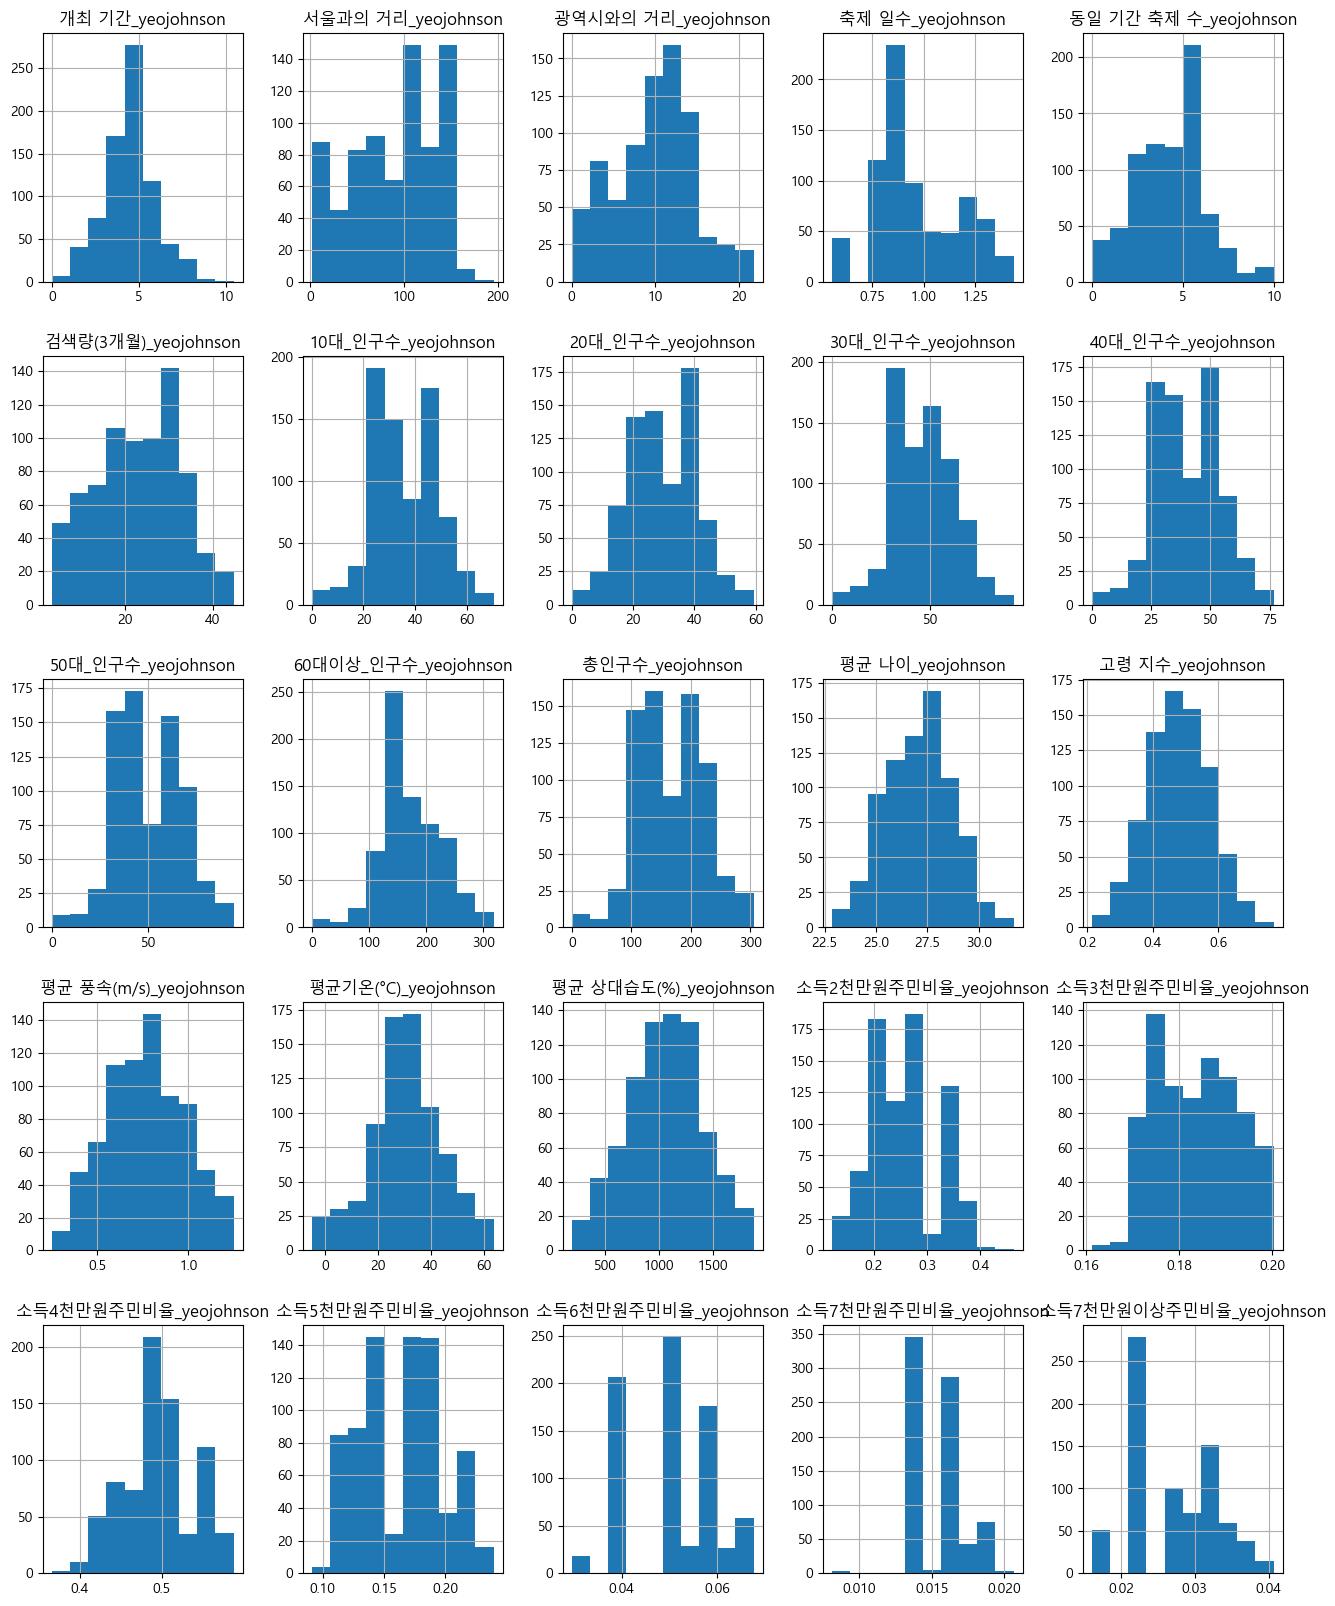

Variable: 개최 기간, Lambda: 0.27227138802165446
Variable: 서울과의 거리, Lambda: 0.832827273508824
Variable: 광역시와의 거리, Lambda: 0.4507695696107665
Variable: 축제 일수, Lambda: -0.6832690358475266
Variable: 동일 기간 축제 수, Lambda: 0.27591950664817533
Variable: 검색량(3개월), Lambda: 0.16842266085900573
Variable: 10대_인구수, Lambda: 0.37817094124339773
Variable: 20대_인구수, Lambda: 0.3641622680940077
Variable: 30대_인구수, Lambda: 0.40695686175259044
Variable: 40대_인구수, Lambda: 0.3799190243706918
Variable: 50대_인구수, Lambda: 0.40339871197692645
Variable: 60대이상_인구수, Lambda: 0.5258568815993575
Variable: 총인구수, Lambda: 0.4616611967250998
Variable: 평균 나이, Lambda: 0.7620150583402137
Variable: 고령 지수, Lambda: 1.1067482082884301
Variable: 평균 풍속(m/s), Lambda: -0.4286379001977256
Variable: 평균기온(°C), Lambda: 1.2760701163288268
Variable: 평균 상대습도(%), Lambda: 1.7567306676253238
Variable: 소득2천만원주민비율, Lambda: 10.856607239764253
Variable: 소득3천만원주민비율, Lambda: -3.9158166254746867
Variable: 소득4천만원주민비율, Lambda: 6.235320486742239
Variable: 소득5천만

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson

# Yeo-Johnson 변환 적용할 변수 리스트
yeojohnson_transform_vars = [
    '개최 기간', '서울과의 거리', '광역시와의 거리', '축제 일수', '동일 기간 축제 수', '검색량(3개월)', 
    '10대_인구수', '20대_인구수', '30대_인구수', '40대_인구수', '50대_인구수', '60대이상_인구수', '총인구수', '평균 나이', '고령 지수', 
    '평균 풍속(m/s)', '평균기온(°C)', '평균 상대습도(%)', '소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율'
]

# 아주 작은 값을 더해줄 상수 -> 0값 문제 해결을 위함
epsilon = 1e-6

# Yeo-Johnson 변환 적용 및 λ 값 저장
lambdas = {}
for var in yeojohnson_transform_vars:
    transformed_data, lambda_ = yeojohnson(df[var] + epsilon)
    df[f'{var}_yeojohnson'] = transformed_data
    lambdas[var] = lambda_

# Yeo-Johnson 변환을 적용한 변수들의 히스토그램
yeojohnson_transformed_vars = [f'{var}_yeojohnson' for var in yeojohnson_transform_vars]

fig = plt.figure(figsize=(16, 20))
ax = fig.gca()

df[yeojohnson_transformed_vars].hist(ax=ax)
plt.show()

# λ 값 출력
for var, lambda_ in lambdas.items():
    print(f'Variable: {var}, Lambda: {lambda_}')

Yeo-Johnson 변환의 Lambda 값: 0.011499971035675854


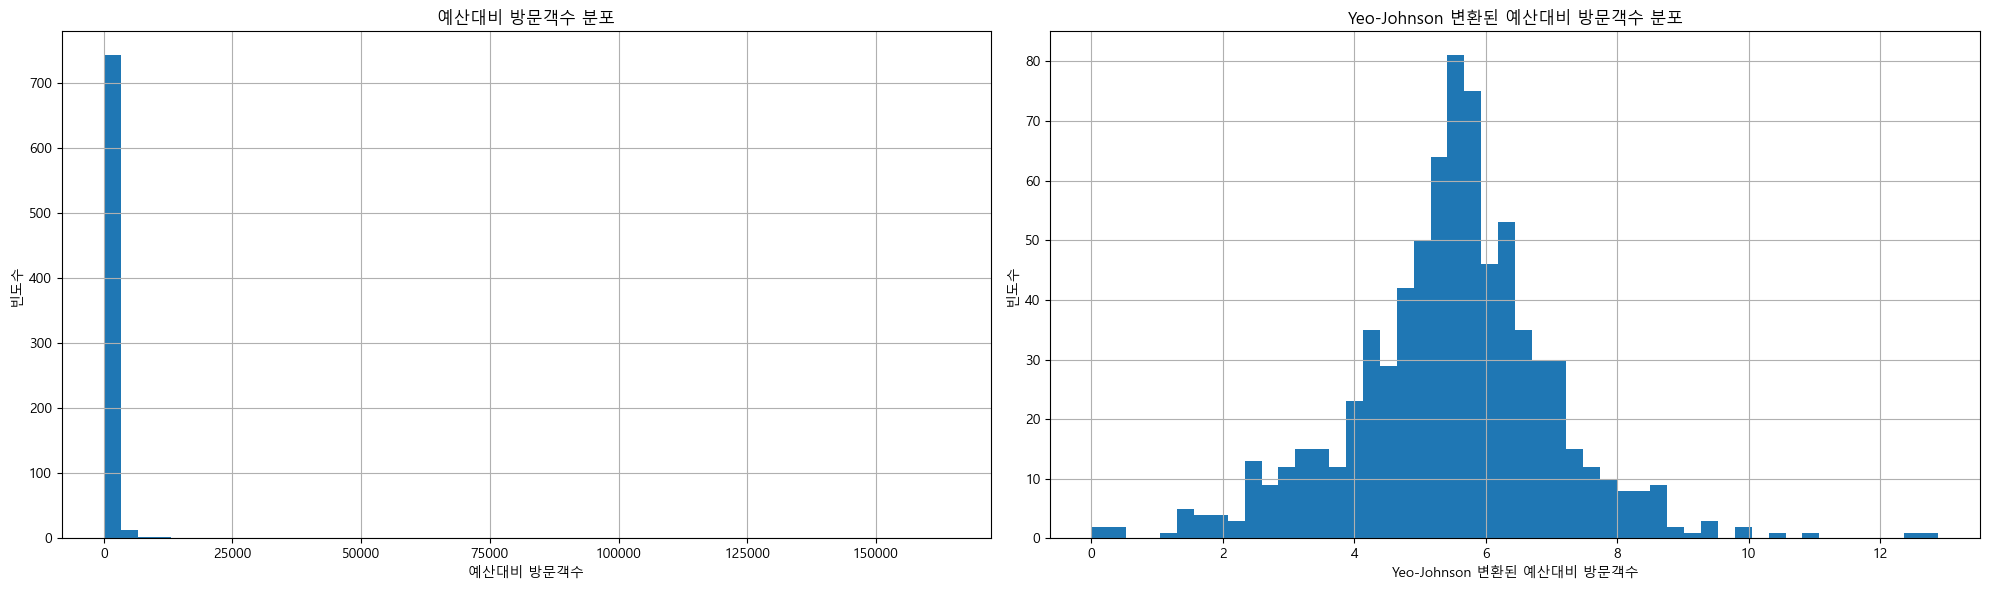

In [13]:
from scipy.stats import yeojohnson

# Yeo-Johnson 변환 적용
transformed_data, lambda_ = yeojohnson(df['예산대비 방문객수'])
print(f'Yeo-Johnson 변환의 Lambda 값: {lambda_}')

df['예산대비 방문객수_yeojohnson'] = transformed_data

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# 원본 예산대비 방문객수 분포
df['예산대비 방문객수'].hist(bins=50, ax=axes[0])
axes[0].set_title('예산대비 방문객수 분포')
axes[0].set_xlabel('예산대비 방문객수')
axes[0].set_ylabel('빈도수')

# Yeo-Johnson 변환된 예산대비 방문객수 분포
df['예산대비 방문객수_yeojohnson'].hist(bins=50, ax=axes[1])
axes[1].set_title('Yeo-Johnson 변환된 예산대비 방문객수 분포')
axes[1].set_xlabel('Yeo-Johnson 변환된 예산대비 방문객수')
axes[1].set_ylabel('빈도수')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# 개최 계절 열을 범주형으로 변환
df['개최 계절'] = df['개최 계절'].astype(str)

# LabelEncoder를 사용하여 레이블 인코딩 적용
label_encoder = LabelEncoder()
df['개최 계절'] = label_encoder.fit_transform(df['개최 계절'])

label_encoder = LabelEncoder()
df['시도명'] = label_encoder.fit_transform(df['시도명'])

In [15]:
# 각 연도에 대해 매핑할 딕셔너리 생성
year_mapping = {2018: 1, 2019: 2, 2021: 3, 2022: 4, 2023: 5}

# '개최연도' 열을 매핑된 값으로 대체
df['개최연도'] = df['개최연도'].map(year_mapping)

In [16]:
df.drop(columns=['개최 기간', '서울과의 거리', '광역시와의 거리', '축제 일수', '평균기온(°C)',
       '동일 기간 축제 수', '검색량(3개월)', '10대_인구수', '20대_인구수', '30대_인구수', '40대_인구수',
       '50대_인구수', '평균 나이', '60대이상_인구수', '총인구수', '고령 지수', '평균 풍속(m/s)',
       '평균 상대습도(%)', '예산대비 방문객수', '소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율',
       '개최연도'], inplace=True)

In [17]:
df.columns

Index(['시도명', '주말/공휴일 유무', '개최 월', '개최 계절', 'KTX역 유무', '비 유무',
       '개최 기간_yeojohnson', '서울과의 거리_yeojohnson', '광역시와의 거리_yeojohnson',
       '축제 일수_yeojohnson', '동일 기간 축제 수_yeojohnson', '검색량(3개월)_yeojohnson',
       '10대_인구수_yeojohnson', '20대_인구수_yeojohnson', '30대_인구수_yeojohnson',
       '40대_인구수_yeojohnson', '50대_인구수_yeojohnson', '60대이상_인구수_yeojohnson',
       '총인구수_yeojohnson', '평균 나이_yeojohnson', '고령 지수_yeojohnson',
       '평균 풍속(m/s)_yeojohnson', '평균기온(°C)_yeojohnson', '평균 상대습도(%)_yeojohnson',
       '소득2천만원주민비율_yeojohnson', '소득3천만원주민비율_yeojohnson',
       '소득4천만원주민비율_yeojohnson', '소득5천만원주민비율_yeojohnson',
       '소득6천만원주민비율_yeojohnson', '소득7천만원주민비율_yeojohnson',
       '소득7천만원이상주민비율_yeojohnson', '예산대비 방문객수_yeojohnson'],
      dtype='object')

<AxesSubplot: >

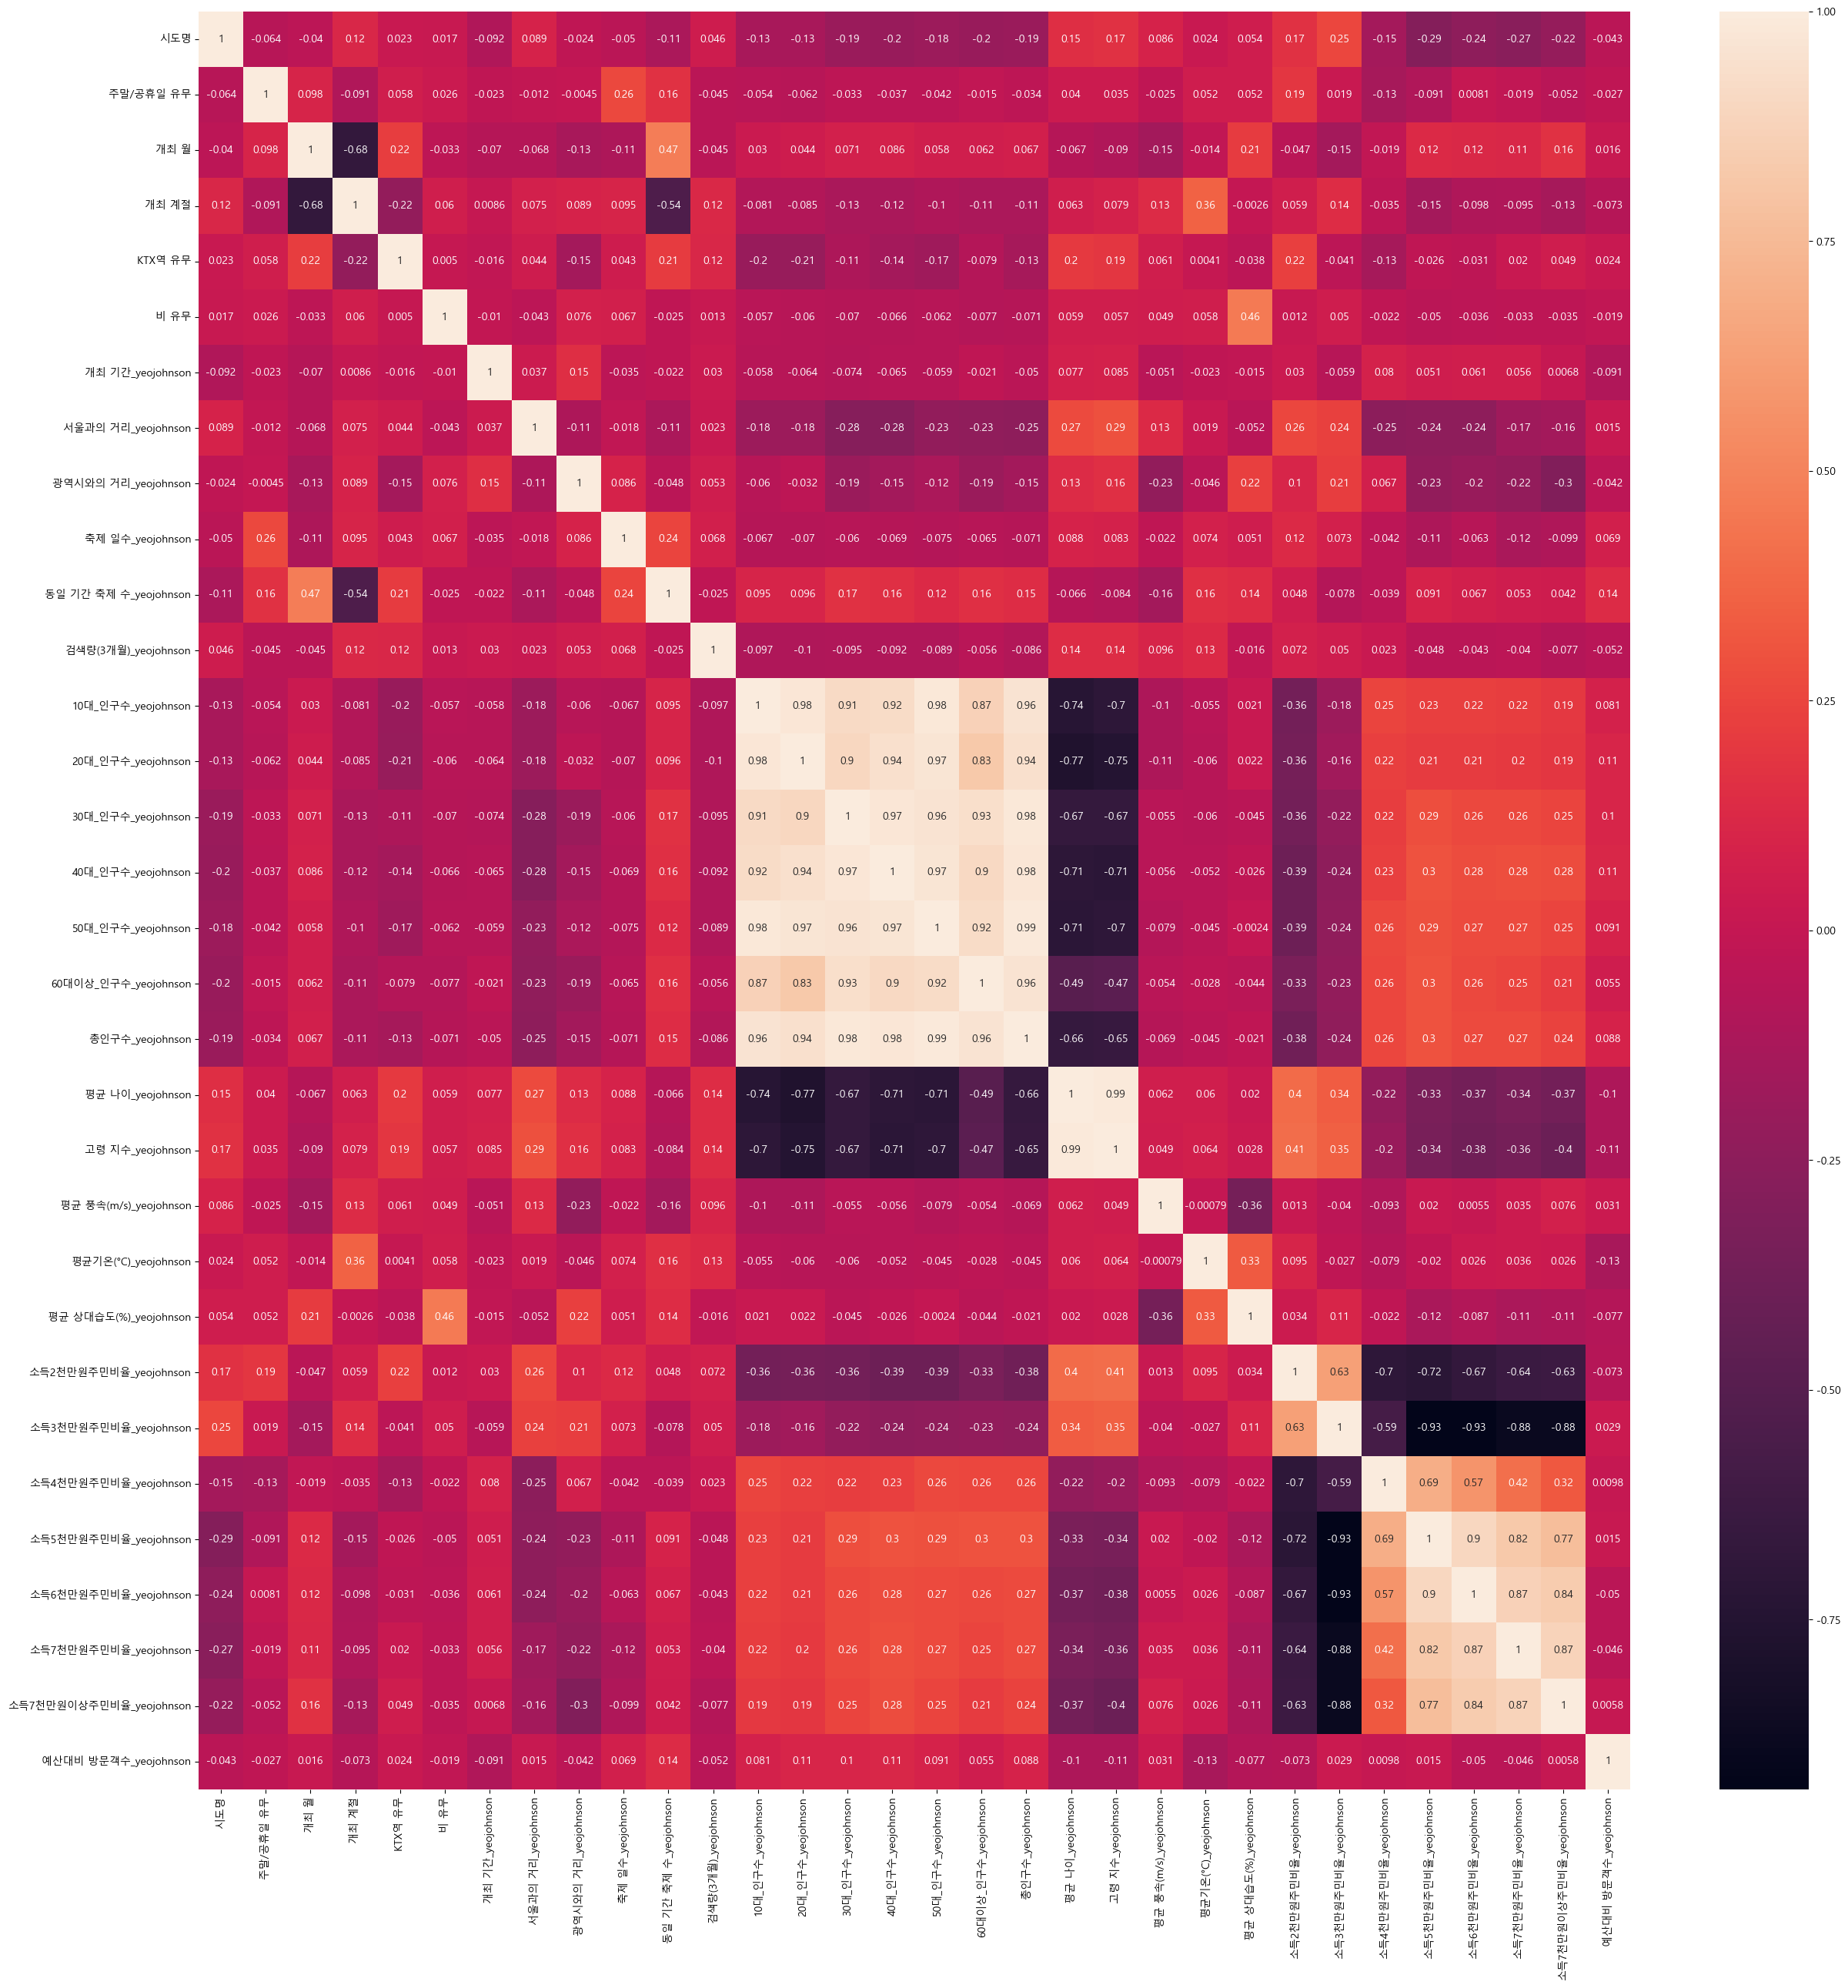

In [18]:
plt.figure(figsize=(30, 30)) 
sns.heatmap(df.corr(), annot=True)

In [19]:
# '방문객수_yeojohnson'와의 상관 관계만 추출
corr_with_target = df.corr()['예산대비 방문객수_yeojohnson'].sort_values(ascending=False).to_frame()

# 상관 관계 표 출력
print("예산대비 방문객수_yeojohnson와의 상관 관계:")
print(corr_with_target)

예산대비 방문객수_yeojohnson와의 상관 관계:
                         예산대비 방문객수_yeojohnson
예산대비 방문객수_yeojohnson                 1.000000
동일 기간 축제 수_yeojohnson                0.136809
40대_인구수_yeojohnson                   0.109709
20대_인구수_yeojohnson                   0.105841
30대_인구수_yeojohnson                   0.102933
50대_인구수_yeojohnson                   0.091016
총인구수_yeojohnson                      0.087548
10대_인구수_yeojohnson                   0.080850
축제 일수_yeojohnson                     0.069477
60대이상_인구수_yeojohnson                 0.055096
평균 풍속(m/s)_yeojohnson                0.030555
소득3천만원주민비율_yeojohnson                0.028554
KTX역 유무                              0.024469
개최 월                                 0.016133
서울과의 거리_yeojohnson                   0.014790
소득5천만원주민비율_yeojohnson                0.014738
소득4천만원주민비율_yeojohnson                0.009817
소득7천만원이상주민비율_yeojohnson              0.005798
비 유무                                -0.018879
주말/공휴일 유무                           -0.026980
광역시와

### 4. 데이터 분할

In [20]:
# 데이터 분할
X = df.drop(columns=['예산대비 방문객수_yeojohnson'])
y = df['예산대비 방문객수_yeojohnson']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(611, 31) (611,)
(153, 31) (153,)


### 5. 모델링

In [22]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import catboost as cb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
# CatBoost 모델 정의
catboost_model = cb.CatBoostRegressor(random_state=42, verbose=0)

# 하이퍼파라미터 탐색 공간 정의
param_space = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'l2_leaf_reg': Integer(1, 5)
}

# KFold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Bayesian Optimization 설정
bayes_search = BayesSearchCV(estimator=catboost_model, search_spaces=param_space, n_iter=50, cv=kf, scoring='r2', n_jobs=-1)

# Bayesian Optimization 수행
bayes_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best cross-validated R^2 score: {bayes_search.best_score_}")

# 최적 하이퍼파라미터로 최종 모델 학습
best_catboost = bayes_search.best_estimator_
best_catboost.fit(X_train, y_train)

# 예측
y_pred = best_catboost.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("CatBoost Performance with Best Parameters (Bayesian Optimization)")
print(f"Test Set Mean Squared Error (MSE): {mse}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse}")
print(f"Test Set R^2 Score: {r2}")
print(f"Test Set Mean Absolute Error (MAE): {mae}") 

Best parameters: OrderedDict([('depth', 8), ('iterations', 300), ('l2_leaf_reg', 1), ('learning_rate', 0.05370619116017978)])
Best cross-validated R^2 score: 0.15671971997211315
CatBoost Performance with Best Parameters (Bayesian Optimization)
Test Set Mean Squared Error (MSE): 1.6317915752625698
Test Set Root Mean Squared Error (RMSE): 1.2774159758131138
Test Set R^2 Score: 0.2832429830264257
Test Set Mean Absolute Error (MAE): 0.923863266342539


XAI

In [47]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


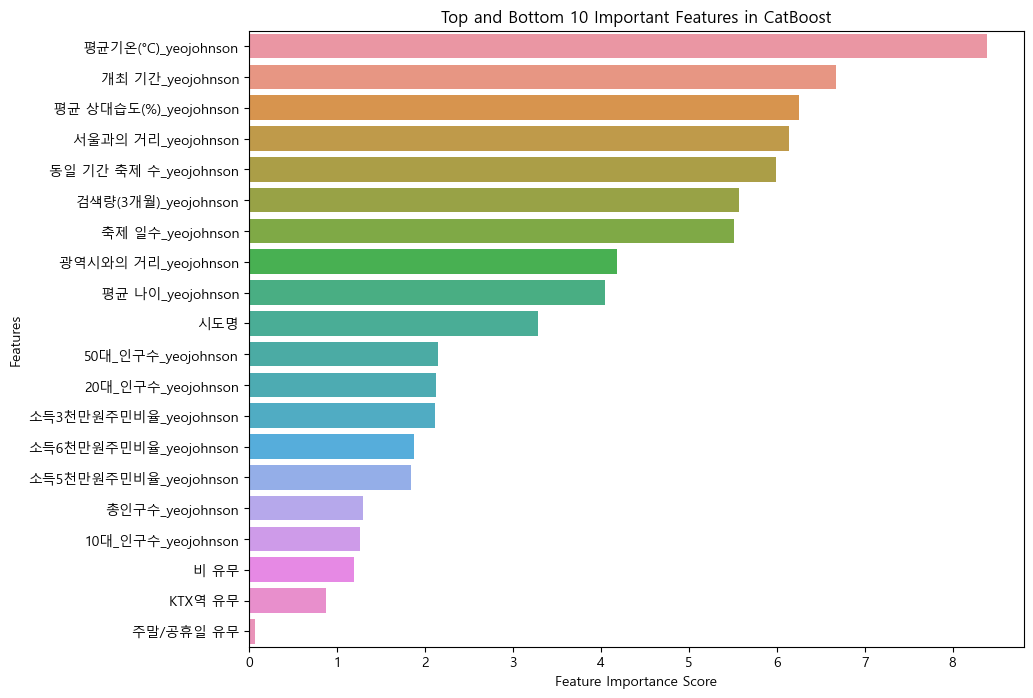

In [48]:
# 변수 중요도 시각화 (CatBoost)
catboost_feature_importances = pd.Series(best_catboost.feature_importances_, index=X_train.columns)

# 상위 및 하위 10개의 변수 중요도 추출
top_catboost_features = catboost_feature_importances.sort_values(ascending=False).head(10)
bottom_catboost_features = catboost_feature_importances.sort_values(ascending=False).tail(10)
important_catboost_features = pd.concat([top_catboost_features, bottom_catboost_features])

# 변수 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=important_catboost_features.values, y=important_catboost_features.index)
plt.title('Top and Bottom 10 Important Features in CatBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [49]:
# 변수 중요도를 데이터프레임으로 변환
catboost_feature_importance_df = pd.DataFrame({'Feature': catboost_feature_importances.index, 'Importance': catboost_feature_importances.values})

# 데이터프레임 저장
catboost_feature_importance_df.to_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_금산군\\final_feature_importance.csv', index=False, encoding='cp949')

In [50]:
catboost_feature_importance_df

,Feature,Importance
0,시도명,3.284873
1,주말/공휴일 유무,0.073697
2,개최 월,3.009010
3,개최 계절,2.947917
4,KTX역 유무,0.879029
5,비 유무,1.193895
6,개최 기간_yeojohnson,6.676054
7,서울과의 거리_yeojohnson,6.145151
8,광역시와의 거리_yeojohnson,4.182436
9,축제 일수_yeojohnson,5.513180


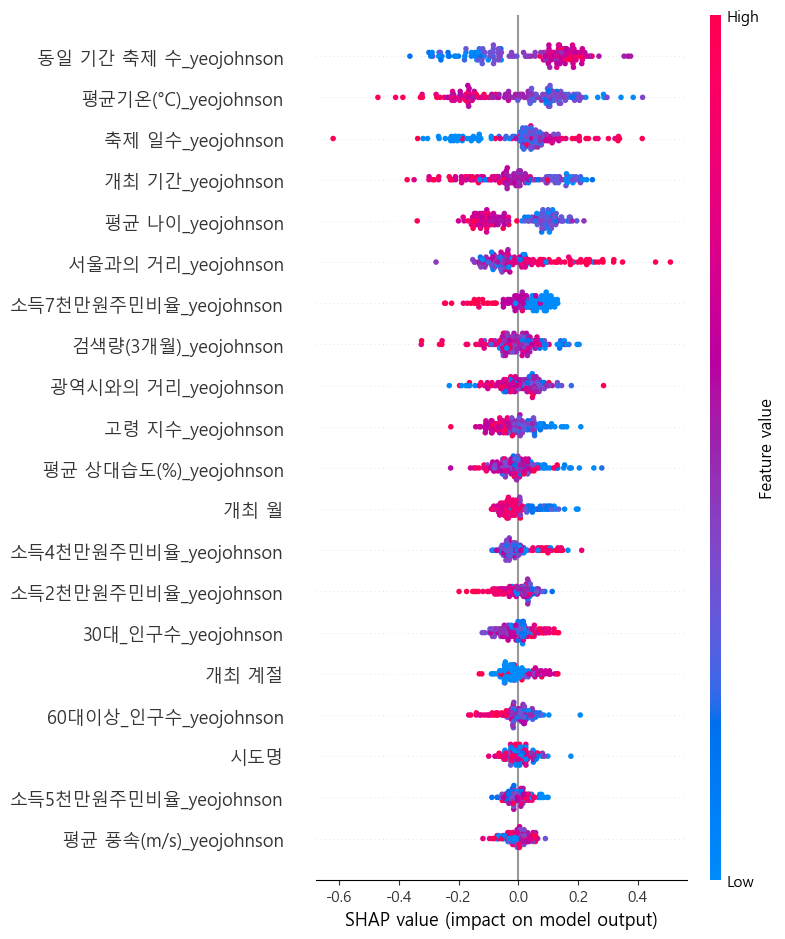

In [51]:
import shap

# CatBoost 모델에 대한 SHAP 값 계산
explainer = shap.Explainer(best_catboost)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [52]:
# 개별 샘플에 대한 변수별 SHAP 값을 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

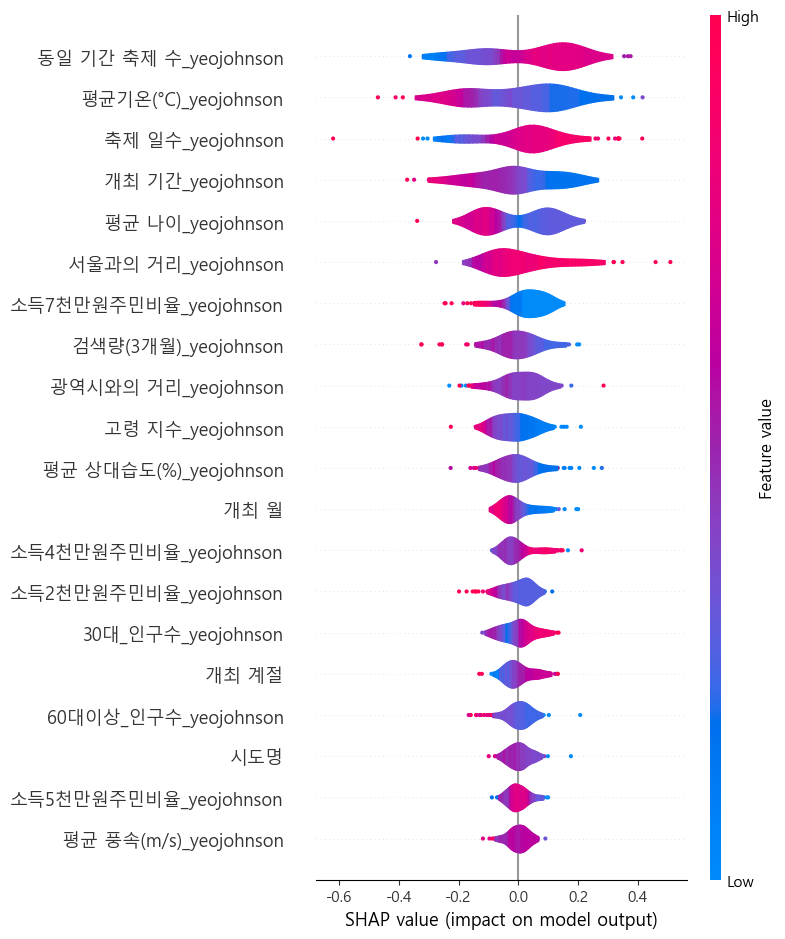

In [53]:
# 변수별 SHAP 값의 분포 표
shap.summary_plot(shap_values, X_test, plot_type='violin')
plt.show()

In [54]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import lime
import lime.lime_tabular

# LIME을 사용하여 설명 생성 (첫 번째 샘플에 대한 시각화)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)
lime_explanation = explainer.explain_instance(X_test.iloc[0], best_catboost.predict)

# LIME 설명 시각화
lime_explanation.show_in_notebook()

In [56]:
'''
# 전체 데이터셋에 대한 LIME 설명 생성 및 시각화
for i in range(len(X_test)):
    lime_explanation = explainer.explain_instance(X_test.iloc[i], best_catboost.predict)
    lime_explanation.show_in_notebook()
    '''

'\n# 전체 데이터셋에 대한 LIME 설명 생성 및 시각화\nfor i in range(len(X_test)):\n    lime_explanation = explainer.explain_instance(X_test.iloc[i], best_catboost.predict)\n    lime_explanation.show_in_notebook()\n    '

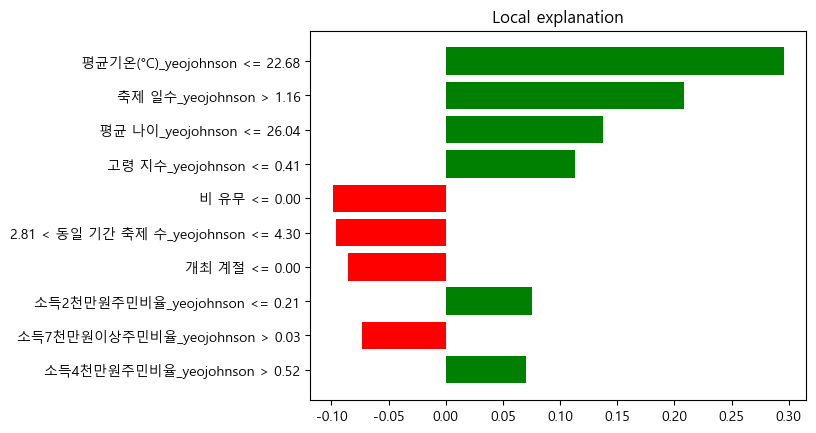

In [57]:
_ = lime_explanation.as_pyplot_figure(label=1)

In [58]:
# LIME 설명 생성
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)

# 각 테스트 샘플에 대한 LIME 값을 추출하여 리스트에 저장
lime_values = [explainer.explain_instance(x, best_catboost.predict).local_exp.values() for x in X_test.values]

In [59]:
# 데이터프레임으로 변환할 열 이름 생성
columns = ['LIME_{}'.format(i) for i in range(30)]

# 빈 데이터프레임 초기화
lime_df = pd.DataFrame(columns=columns)

# 각 LIME 값 리스트에 대해 데이터프레임에 추가
for sample_lime_values in lime_values:
    lime_dict = {}  # 각 샘플의 LIME 값을 담을 딕셔너리 초기화
    for sublist in sample_lime_values:  # 각 변수별 LIME 값에 대한 하위 리스트 순회
        for index, value in sublist:  # 각 변수별 LIME 값 순회
            lime_dict['LIME_{}'.format(index)] = value  # 딕셔너리에 LIME 값 추가
    lime_df = lime_df.append(lime_dict, ignore_index=True)  # 딕셔너리를 데이터프레임에 행으로 추가

lime_df = lime_df.fillna(0)
lime_df.index = X_test.index

# 결과 출력
lime_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

,LIME_0,LIME_1,LIME_2,LIME_3,LIME_4,LIME_5,LIME_6,LIME_7,LIME_8,LIME_9,LIME_10,LIME_11,LIME_12,LIME_13,LIME_14,LIME_15,LIME_16,LIME_17,LIME_18,LIME_19,LIME_20,LIME_21,LIME_22,LIME_23,LIME_24,LIME_25,LIME_26,LIME_27,LIME_28,LIME_29,LIME_30
396,0,0,0.000000,-0.068094,0.0,-0.069993,0.000000,-0.083669,0.000000,0.158986,-0.067921,0.0000,0,0,0.000000,0,0.0,0.000000,0,0.128336,0.100302,0,0.256022,0.0,0.076938,0.0,0.058289,0.0,0,0.000000,0.0
282,0,0,0.000000,0.049320,0.0,0.000000,0.000000,-0.121492,0.000000,0.191237,0.200524,0.0000,0,0,0.000000,0,0.0,0.056256,0,0.122918,0.053128,0,-0.299515,0.0,-0.073233,0.0,0.000000,0.0,0,-0.070286,0.0
841,0,0,0.141415,0.062560,0.0,0.000000,0.139560,0.223400,-0.065903,0.201617,-0.067336,0.0000,0,0,0.000000,0,0.0,0.000000,0,0.131505,0.000000,0,0.263221,0.0,0.000000,0.0,0.000000,0.0,0,0.139473,0.0
208,0,0,0.000000,-0.077628,0.0,0.000000,0.131729,-0.130693,0.000000,-0.216163,0.238668,0.0000,0,0,0.070109,0,0.0,-0.112588,0,0.140092,0.124012,0,0.139676,0.0,0.000000,0.0,0.000000,0.0,0,0.000000,0.0
367,0,0,0.133325,0.069610,0.0,0.076353,0.000000,-0.082610,0.000000,0.098878,0.000000,0.0000,0,0,-0.115573,0,0.0,0.000000,0,0.151966,0.118465,0,-0.124215,0.0,0.000000,0.0,0.000000,0.0,0,0.141987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0.000000,-0.090962,0.0,-0.062962,0.000000,0.233608,0.000000,-0.206131,0.224468,0.0000,0,0,0.000000,0,0.0,0.000000,0,-0.188469,-0.096581,0,-0.147530,0.0,-0.105093,0.0,0.000000,0.0,0,0.137629,0.0
603,0,0,0.124925,0.064682,0.0,-0.056650,0.000000,-0.087935,0.000000,0.084936,0.000000,0.0000,0,0,0.000000,0,0.0,0.000000,0,-0.096081,0.000000,0,0.112463,0.0,-0.072626,0.0,-0.071964,0.0,0,0.143181,0.0
376,0,0,0.126256,0.067697,0.0,0.000000,0.061838,-0.112138,0.000000,-0.194067,-0.068073,-0.0735,0,0,0.000000,0,0.0,0.000000,0,0.126135,0.000000,0,0.267315,0.0,0.000000,0.0,0.000000,0.0,0,0.140166,0.0
356,0,0,-0.062454,-0.092629,0.0,-0.065672,0.000000,-0.093125,0.000000,-0.185189,0.235817,0.0000,0,0,0.000000,0,0.0,0.000000,0,-0.100385,0.000000,0,0.118020,0.0,-0.115419,0.0,0.000000,0.0,0,0.146265,0.0


In [60]:
columns = ['SHAP_{}'.format(i) for i in range(len(shap_values[0]))]
shap_df = pd.DataFrame(shap_values, columns=columns, index=X_test.index)
shap_df

,SHAP_0,SHAP_1,SHAP_2,SHAP_3,SHAP_4,SHAP_5,SHAP_6,SHAP_7,SHAP_8,SHAP_9,SHAP_10,SHAP_11,SHAP_12,SHAP_13,SHAP_14,SHAP_15,SHAP_16,SHAP_17,SHAP_18,SHAP_19,SHAP_20,SHAP_21,SHAP_22,SHAP_23,SHAP_24,SHAP_25,SHAP_26,SHAP_27,SHAP_28,SHAP_29,SHAP_30
396,-0.019747,-0.000899,-0.010847,-0.029212,0.005573,-0.016493,0.034737,-0.032548,0.047090,0.323694,-0.022721,0.082579,0.022057,0.068165,-0.007609,0.022416,0.036436,0.000863,0.018534,0.115295,0.161779,0.002722,0.195017,0.033315,0.061496,-0.013056,0.129327,0.015806,0.021620,0.047318,0.013691
282,0.049283,-0.000690,0.006812,-0.013686,0.017231,-0.016734,0.002039,-0.048603,-0.041997,-0.077029,0.173518,0.015508,-0.007426,-0.018690,-0.012026,-0.019538,0.009787,0.037552,-0.046414,0.219620,0.018548,0.053428,-0.140895,-0.042466,0.022854,0.004618,-0.013383,-0.015292,0.003006,0.012712,0.007747
841,0.007914,-0.004051,0.125993,0.091300,-0.013711,0.000097,0.107838,0.012053,-0.044840,0.060616,-0.120783,-0.005410,0.044968,0.014320,-0.049800,0.007906,0.011647,-0.018547,0.013029,0.171068,0.088678,-0.029035,0.178114,0.008354,-0.003721,0.022858,0.004429,0.045079,0.003477,0.130565,0.049609
208,-0.003906,-0.000255,-0.028617,-0.002693,-0.023517,-0.001846,0.207845,0.021405,-0.022439,-0.149908,0.187253,0.089297,0.017897,0.013929,0.104188,0.051752,0.044650,-0.044050,0.019830,0.088984,0.036511,-0.017567,0.101318,-0.087388,0.016485,0.018983,-0.013136,0.034547,0.042861,0.027190,0.008597
367,-0.016937,-0.001249,0.099547,0.009189,-0.013904,0.086714,0.093368,-0.078308,0.071789,0.057170,-0.060733,-0.010725,0.012947,0.003331,-0.045958,-0.007249,0.005907,0.039873,0.020848,0.174039,0.073633,-0.011712,-0.152487,0.018886,-0.035829,0.013215,-0.006187,0.000355,0.013343,0.124736,0.024365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.023961,-0.001302,-0.063487,-0.021203,-0.000531,-0.012860,-0.037958,0.120434,0.030781,-0.265032,0.134711,-0.054009,-0.014867,-0.035336,0.013289,-0.014731,-0.022603,-0.010520,-0.019899,-0.131307,-0.081438,-0.019800,-0.220388,-0.098249,-0.173187,0.007217,-0.036478,-0.010628,0.009137,-0.009262,-0.116404
603,-0.002267,-0.001352,0.027652,0.077020,-0.000291,0.011034,-0.046775,-0.075349,0.026243,0.133119,0.092845,-0.001438,-0.025575,-0.024189,0.009512,-0.039497,-0.009058,0.010346,0.008488,-0.083037,-0.068514,0.030709,0.114520,-0.002784,-0.050044,0.000773,-0.034952,-0.015175,0.008508,0.084099,0.018315
376,-0.064677,-0.002202,0.082722,0.061657,-0.001030,-0.016089,0.096603,-0.090653,0.029189,-0.224129,-0.112120,-0.052369,0.011286,-0.002356,-0.076330,-0.002431,-0.019907,-0.016947,-0.014172,0.125181,0.051673,-0.011529,0.052323,-0.025180,-0.035503,-0.008819,-0.022797,-0.027409,0.013394,0.095033,0.023761
356,0.003329,-0.001456,-0.053718,-0.062553,0.003550,-0.007711,-0.048947,-0.077294,-0.125243,0.006756,0.145849,0.045438,-0.013146,-0.011384,0.015806,-0.017989,-0.031633,0.020062,0.002430,-0.117643,-0.052137,0.005542,0.042254,-0.043786,-0.073201,-0.012720,-0.039193,-0.017508,0.020741,0.067555,0.014657


In [61]:
feature_names = X_test.columns

shap_df.columns = feature_names
# shap_df.columns = [f'SHAP_{col}' for col in shap_df.columns]
lime_df.columns = feature_names
# lime_df.columns = [f'LIME_{col}' for col in lime_df.columns]

In [65]:
# SHAP 값 데이터프레임을 CSV 파일로 내보내기
shap_df.to_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_금산군\\final_shap_values.csv', encoding='cp949')

# LIME 값 데이터프레임을 CSV 파일로 내보내기
lime_df.to_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_금산군\\final_lime_values.csv', encoding='cp949')

In [66]:
result_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

result_df.to_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_금산군\\final_prediction_result.csv', encoding='cp949')